La siguiente ecuación representa una señal modulada en amplitud, musicalmente se lo conoce como *trémolo*:

\begin{equation*}
y(t) = [1 + m \cdot \cos (2\pi f_m \cdot t)] \cdot A \cdot \sin(2\pi f_c \cdot t)
\end{equation*}

Donde:
* $ m $ es el índice de modulación, con valor entre $0$ y $1$
* $\sin(2\pi f_c \cdot t)$ se denomina señal portadora
* $\cos (2\pi f_m \cdot t)$ se denomina señal moduladora
* $f_c$ y $f_m$ son las frecuencias de la señal portadora y moduladora

**1.** Generemos una señal modulada a partir de una frecuencia de portadora de 1 kHz y una moduladora de 250 Hz. Debemos comenzar definiendo todas las variables que fueron mencionadas para construir la ecuación, generar un vector tiempo y generar las dos señales involucradas, para finalmente obtener la  señal resultante.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fc = 1000  # frecuencia de portadora
fm = 250  # frecuencia de moduladora
m = 0.5  # indice de modulacion
t = 1  # duracion de 1 segundo
sr = fc * 20  # frecuencia de muestreo para construir el vector tiempo

# construyo el vector tiempo
tiempo = np.linspace(0, t, sr * t, dtype=np.float32)

# señales portadora y moduladora
signal_c = np.cos(2 * np.pi * fc * tiempo)  # portadora
signal_m = np.sin(2 * np.pi * fm * tiempo)  # moduladora

signal_y = (1 + m * signal_m) * signal_c  # señal AM

**2.** Grafiquemos las señales portadora y moduladora en tiempo, agregando etiquetas para cada gráfico y rótulos para los ejes. Observemos que graficar sobre todo el vector tiempo no nos permite ver cómodamente las señales, así que definiremos un intervalo de muestras adecuado, por ejemplo 300 muestras.

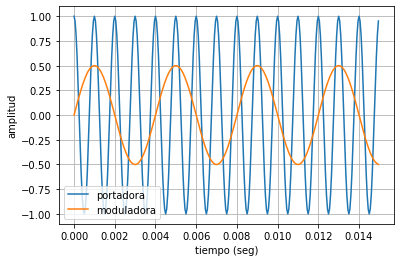

In [39]:
plt.figure()
plt.plot(t[0:300], signal_c[0:300], label = 'portadora')
plt.plot(t[0:300], m * signal_m[0:300], label = 'moduladora')
plt.xlabel('tiempo (seg)')
plt.ylabel('amplitud')
plt.grid()
plt.legend()
plt.show()

**3.** Ahora grafiquemos la señal modulada en tiempo, de la misma forma que hicimos con las anteriores.

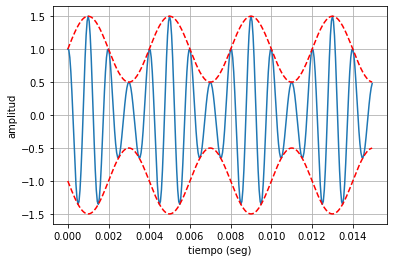

In [12]:
plt.figure()
plt.plot(t[0:300], signal_y[0:300])
#plt.plot(t[0:300], -(1 + m * signal_m[0:300]), linestyle = '--',color = 'r')
#plt.plot(t[0:300], (1 + m * signal_m[0:300]), linestyle = '--',color = 'r')
plt.xlabel('tiempo (seg)')
plt.ylabel('amplitud')
plt.grid()
plt.show()

**4.** Ahora, ¿qué tal si generamos funciones para implementar lo que anteriormente programamos? Vamos a generar funciones para aplicar la modulación, e implementar las dos gráficas anteriores. Debemos pensar en los argumentos de entrada y salida de las mismas, y cómo van a interactuar entre sí.

In [36]:
def tremolo(fc, fm, m, sr, t=1):
    tiempo = np.linspace(0, t, sr * t, dtype=np.float32)
    signal_c = np.cos(2 * np.pi * fc * tiempo)
    signal_m = np.sin(2 * np.pi * fm * tiempo)
    signal_y = (1 + m * signal_m) * signal_c
    return signal_y, signal_c, signal_m, tiempo
    
def graficar_ambas(tiempo, num_samples, portadora, moduladora):
    plt.figure()
    plt.plot(tiempo[0:num_samples], 
             signal_c[0:num_samples], 
             label = 'portadora')
    plt.plot(tiempo[0:num_samples], 
             m * signal_m[0:num_samples], 
             label = 'moduladora')
    plt.xlabel('tiempo (seg)')
    plt.ylabel('amplitud')
    plt.grid()
    plt.legend()
    plt.show()
    
def graficar_efecto(tiempo, num_samples, signal_modulada):
    plt.figure()
    plt.plot(tiempo[0:num_samples], signal_y[0:num_samples])
    plt.xlabel('tiempo (seg)')
    plt.ylabel('amplitud')
    plt.grid()
    plt.show()

**5.** Por último, aprovecharemos la función `subplots` para generar ambos gráficos separados dentro de una misma ventana. Si definimos a cada gráfico como `ax1` y `ax2` podemos utilizar las funciones del módulo pyplot en forma similar a como lo hacíamos antes. Por ejemplo, los *labels* ahora se definen de la siguiente manera: `ax1.set_xlabel` define la etiqueta para el eje X.
Vamos a crear la función **graficar**, que contenga dos gráficos implementados de la forma aquí mencionada. 

In [36]:
def graficar(tiempo, portadora, moduladora):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize =(20,8))
    ax1.grid()
    ax1.plot(tiempo[0:300], signal_c[0:300])
    ax1.plot(tiempo[0:300], m * signal_m[0:300])
    ax1.set_xlabel('tiempo (seg)')
    ax1.set_ylabel('amplitud')

    ax2.grid()
    ax2.plot(tiempo[0:300], signal_y[0:300])
    ax2.plot(tiempo[0:300], -(1 + m * signal_m[0:300]), linestyle = '--',color = 'r')
    ax2.plot(tiempo[0:300], (1 + m * signal_m[0:300]), linestyle = '--',color = 'r')
    plt.show()

In [24]:
out, port, mod, tiempo =tremolo(1000,250,0.3,fc*20)

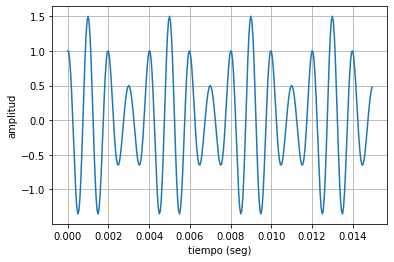

In [31]:
graficar_efecto(tiempo, 300, out)

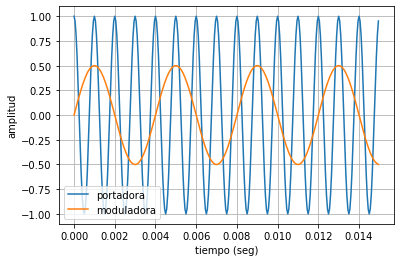

In [32]:
graficar_ambas(tiempo, 300, port, mod)

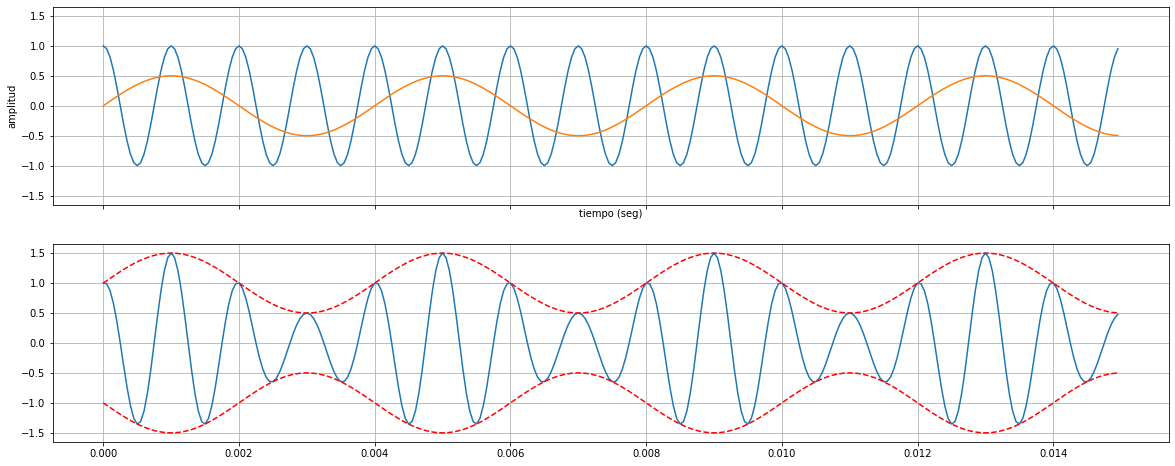

In [37]:
graficar(tiempo, port, mod)